<a href="https://colab.research.google.com/github/ishanks06/MachineLearning/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

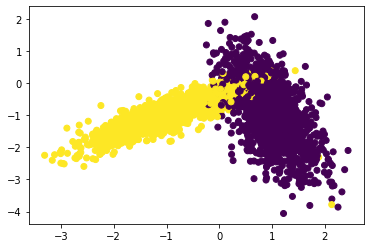

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [0]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  data=[]
  b = []
  result = []
  index= []
  totallen = 0
  train_len = len(x_train)
  for i in range(0,folds):
    if i != folds-1:
      b = x_train[totallen:totallen + int(train_len/folds)]
      c = y_train[totallen:totallen + int(train_len/folds)]
      totallen = totallen + len(b)
      data.append(b)
      result.append(c)
    else:
      b = x_train[totallen:train_len]
      c = y_train[totallen:train_len]
      data.append(b)
      result.append(c)
    for cv in range(0,len(folds)):
      testdata = []
      cvdata = []
      for d in range(0,len(data)):
        if cv != d:
          for value in data[d]:
            testdata.append(value)
        else:
          for value in data[d]:
            cvdata.append(value)
      for k in param_range 
  return data




In [0]:
data = RandomSearchCV(X_train[:100],X_test,"KNeighborsClassifier",(1,50),3)

In [33]:
list(data[1])

[array([-0.68796322, -0.73773206]),
 array([ 1.13717883, -1.80799758]),
 array([-1.56079324, -1.2677586 ]),
 array([ 1.7847375, -2.5595918]),
 array([ 0.71697342, -0.10021501]),
 array([-0.7523123 , -1.10237046]),
 array([-0.11954242, -0.62214009]),
 array([ 1.13639188, -1.84545599]),
 array([ 0.07761538, -0.3992814 ]),
 array([-0.22440225, -0.07317951]),
 array([ 1.04109425, -0.6542442 ]),
 array([ 0.67284519, -1.04513384]),
 array([ 1.70181609, -2.26569736]),
 array([-1.10745126, -0.74698698]),
 array([-0.86799749, -0.60957171]),
 array([ 0.56595448, -1.69862464]),
 array([0.19207611, 0.0241306 ]),
 array([-0.09138634, -0.57868711]),
 array([0.69092637, 0.17862651]),
 array([-0.23283203, -0.57420186]),
 array([-1.67339212, -1.75339973]),
 array([ 0.76189435, -0.35807831]),
 array([-2.74586155, -2.16695503]),
 array([ 1.05369275, -0.73212758]),
 array([-0.35518029, -0.94320941]),
 array([-0.58620754, -0.61267818]),
 array([ 1.15330805, -2.1261236 ]),
 array([ 1.09994745, -0.47232842])

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>